In [33]:
%cd /home/lcc/projects/MetaHarmonizer

/home/lcc/projects/MetaHarmonizer


/home/lcc/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [24]:
import gevent.monkey

gevent.monkey.patch_all(thread=False, select=False)

In [34]:
import pandas as pd
from importlib import reload
from src.models import ontology_mapper_st as om_st
from src.Engine import ontology_mapping_engine as ome
import src.models.ontology_mapper_lm as om_lm
import src.models.ontology_mapper_rag_faiss as om_rag

reload(om_st)
reload(ome)
reload(om_lm)
reload(om_rag)

<module 'src.models.ontology_mapper_rag_faiss' from '/home/lcc/projects/MetaHarmonizer/src/models/ontology_mapper_rag_faiss.py'>

In [35]:
from src.models.calc_stats import CalcStats

calc = CalcStats()

In [ ]:
# Deprecated
cura_map = pd.read_csv(
    './data/corpus/cbio_body_site/body_site_query_for_NCIT:C32221.csv')
query_list = cura_map['original_value'].tolist()
small_corpus_list = cura_map['curated_ontology'].to_list()
# large_corpus_list = pd.read_csv('./data/corpus_from_NCIT_C1909.csv')

In [36]:
# Updated code to pass the dict rather than a DataFrame
df = pd.read_csv(
    './data/corpus/cbio_body_site/body_site_query_for_NCIT:C32221.csv')

query_list = df['original_value'].tolist()
small_corpus_list = df['curated_ontology'].tolist()

cura_map = dict(zip(df['original_value'], df['curated_ontology']))

In [37]:
# LM Strategy w/ SapBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)

19/06//2025 11:32:1750357961 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
19/06//2025 11:32:1750357961 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
19/06//2025 11:32:1750357961 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
19/06//2025 11:32:1750357961 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
19/06//2025 11:32:1750357961 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
19/06//2025 11:32:1750357961 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module


In [38]:
lm_sapbert_result = onto_engine_large.run()

19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Running Ontology Mapping
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
19/06//2025 11:32:1750357967 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
19/06//2025 11:32:1750357967 AM - INFO 

In [39]:
lm_sapbert_result

,original_value,curated_ontology,match_level,stage,top1_match,top1_score,top2_match,top2_score,top3_match,top3_score,top4_match,top4_score,top5_match,top5_score
0,"""BRAIN, CEREBELLUM""",Cerebellum,1,2,Cerebellum,0.9504,Brain,0.7141,Central Lobe,0.6609,Medulla Oblongata,0.6389,Infratentorial Brain,0.6267
1,"""BRAIN, LEFT FRONTAL""",Frontal Lobe,1,2,Frontal Lobe,0.6448,Left Lobe of the Liver,0.5966,Lobe of the Left Lung,0.5741,Upper Lobe of the Left Lung,0.5677,Left Thigh,0.5379
2,"""BRAIN, PARIETAL""",Parietal Lobe,1,2,Parietal Lobe,0.9447,Frontal Lobe,0.6623,Occipital Lobe,0.6383,Infratentorial Brain,0.6245,Cerebral Cortex,0.6010
3,"""BRAIN, RIGHT FRONTAL""",Frontal Lobe,1,2,Frontal Lobe,0.6667,Right Thigh,0.5532,Right Lobe of the Liver,0.5188,Upper Lobe of the Right Lung,0.5136,Middle Lobe of the Right Lung,0.4916
4,"""BRAIN, RIGHT TEMPORAL""",Temporal Lobe,1,2,Temporal Lobe,0.6343,Temporal Muscle,0.5315,Middle Lobe of the Right Lung,0.5315,Thalamus,0.5253,Right Lobe of the Liver,0.5125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,URETER; RENAL PELVIS,Renal Pelvis,1,2,Renal Pelvis,0.7736,Upper Urinary System,0.6299,Infrarenal Aortic Segment,0.4830,Ilium,0.4674,Bladder Neck,0.4256
435,URETER; RENAL PELVIS; BLADDER,Renal Pelvis,1,2,Renal Pelvis,0.6544,Upper Urinary System,0.5991,Bladder Neck,0.4968,Ilium,0.4073,Recto-Vaginal Pouch,0.3952
436,VENTRICLES,Brain Ventricle,1,2,Brain Ventricle,0.8461,Fourth Ventricle,0.7390,Third Ventricle,0.6933,Lateral Ventricle,0.6389,Cardiac Atrium,0.5948
437,VERY DISTAL RECTUM RECURRENCE,Rectum,1,2,Rectum,0.5060,Recto-Vaginal Pouch,0.4271,Right Colon,0.4023,Descending Colon,0.3790,Transverse Colon,0.3349


In [40]:
lm_sapbert_result.to_csv("lm_sapbert_result_bodysite.csv", index=False)

In [41]:
# LM Strategy w/ SapBERT
lm_sapbert_accuracy_df = calc.calc_accuracy(lm_sapbert_result)
print(lm_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  71.298405
1  Top 3 Matches  89.977221
2  Top 5 Matches  93.849658


In [11]:
# st - pubmed-bert
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)

st_pubmetbert_result = onto_engine_large.run()

17/06//2025 02:03:1750194231 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:03:1750194231 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:03:1750194231 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:03:1750194231 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:03:1750194231 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 02:03:1750194231 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 02:03:1750194231 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
17/06//2025 02:03:1750194231 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
17/06//2025 02:03:1750194231 PM - INFO - OntoMapST: Initialized OntoMap Sentence Transformer module
17/06//2025 02:03:1750194231 PM - INFO - OntoMapST: Initialized OntoMap Sentence Transformer module
17/06//2025 02:03:1750194231 PM - INFO - OntoMapST.get_match_results

Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7fab6900a480 epoll pending=0 ref=0 fileno=96 thread_ident=0x7fab69bff640>
	Handles:
[]
Exception in worker
Traceback (mos

17/06//2025 02:03:1750194236 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 02:03:1750194236 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 02:03:1750194236 PM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 02:03:1750194236 PM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 02:03:1750194236 PM - INFO - OntoMapST.get_match_results: Results Generated
17/06//2025 02:03:1750194236 PM - INFO - OntoMapST.get_match_results: Results Generated


In [12]:
# Sentences Transformer Strategy w/ PubMedBERT
st_pubmedbert_accuracy_df = calc.calc_accuracy(st_pubmetbert_result)
print(st_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  74.259681
1  Top 3 Matches  88.838269
2  Top 5 Matches  92.710706


In [13]:
st_pubmetbert_result.to_csv("st_pubmedbert_result_bodysite.csv", index=False)

In [14]:
# Language Model Strategy w/ PubMedBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='pubmed-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='lm',
    **other_params)

lm_pubmedbert_result = onto_engine_large.run()

17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
17/06//2025 02:04:1750194273 PM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
17

In [15]:
# Language Model Strategy w/ PubMedBERT
lm_pubmedbert_accuracy_df = calc.calc_accuracy(lm_pubmedbert_result)
print(lm_pubmedbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  72.892938
1  Top 3 Matches  88.382688
2  Top 5 Matches  92.482916


In [16]:
lm_pubmedbert_result.to_csv("lm_pubmedbert_result_bodysite.csv", index=False)

In [14]:
# RAG Strategy w/ SapBERT
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_result = rag_engine.run()

13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
13/06//2025 11:29:1749839365 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
13

Processing queries: 100%|██████████| 439/439 [00:07<00:00, 58.18it/s]

13/06//2025 11:29:1749839373 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_result.to_csv("rag_sapbert_result_partially_cleaned_contexts.csv",
                  index=False)

In [16]:
# RAG Strategy w/ SapBERT
rag_accuracy_df = calc.calc_accuracy(rag_result)
rag_accuracy = rag_accuracy_df[rag_accuracy_df["Accuracy Level"] ==
                               "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG SapBERT Top-5 Accuracy: {rag_accuracy:.2f}%")
print(rag_accuracy_df)

RAG SapBERT Top-5 Accuracy: 91.34%
  Accuracy Level   Accuracy
0    Top 1 Match  64.464692
1  Top 3 Matches  87.471526
2  Top 5 Matches  91.343964


In [21]:
# RAG Strategy w/ SapBERT not cleaned up
rag_engine = ome.OntoMapEngine(method='mt-sap-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_result = rag_engine.run()

13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 12:16:1749842188 PM - INFO - OntoMapEn

Processing queries: 100%|██████████| 439/439 [00:05<00:00, 77.17it/s]

13/06//2025 12:16:1749842193 PM - INFO - OntoMapRAG: Results Generated
13/06//2025 12:16:1749842193 PM - INFO - OntoMapRAG: Results Generated
13/06//2025 12:16:1749842193 PM - INFO - OntoMapRAG: Results Generated


In [23]:
rag_result.to_csv("rag_sapbert_result_removed_duplicates.csv", index=False)

In [22]:
# RAG Strategy w/ SapBERT not cleaned up
rag_accuracy_df = calc.calc_accuracy(rag_result)
rag_accuracy = rag_accuracy_df[rag_accuracy_df["Accuracy Level"] ==
                               "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG SapBERT Top-5 Accuracy: {rag_accuracy:.2f}%")
print(rag_accuracy_df)

RAG SapBERT Top-5 Accuracy: 90.66%
  Accuracy Level   Accuracy
0    Top 1 Match  67.198178
1  Top 3 Matches  85.876993
2  Top 5 Matches  90.660592


In [17]:
# Real ST Strategy w/ SapBERT
other_params = {"test_or_prod": "test"}
onto_engine_large = ome.OntoMapEngine(
    method='mt-sap-bert',
    topk=5,
    query=query_list,
    corpus=small_corpus_list,
    cura_map=cura_map,
    yaml_path='./src/models/method_model.yaml',
    om_strategy='st',
    **other_params)
st_sapbert_result = onto_engine_large.run()

17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Initialized OntoMap Engine module
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Running Ontology Mapping
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 02:16:1750195004 PM - INFO - OntoMapEngine: Separating exact and non-exact matches
17/06//2025 02:16:1750195004 PM

No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.
No sentence-transformers model found with name cambridgeltl/SapBERT-from-PubMedBERT-fulltext-mean-token. Creating a new one with mean pooling.


17/06//2025 02:16:1750195011 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 02:16:1750195011 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 02:16:1750195011 PM - INFO - OntoMapST.get_match_results: Calculating cosine similarity matrix
17/06//2025 02:16:1750195011 PM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 02:16:1750195011 PM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 02:16:1750195011 PM - INFO - OntoMapST.get_match_results: Generating results table
17/06//2025 02:16:1750195012 PM - INFO - OntoMapST.get_match_results: Results Generated
17/06//2025 02:16:1750195012 PM - INFO - OntoMapST.get_match_results: Results Generated
17/06//2025 02:16:1750195012 PM - INFO - OntoMapST.get_match_results: Results Generated


In [18]:
st_sapbert_result.to_csv("st_sapbert_result_bodysite.csv", index=False)

In [20]:
st_sapbert_accuracy_df = calc.calc_accuracy(st_sapbert_result)
print(st_sapbert_accuracy_df)

  Accuracy Level   Accuracy
0    Top 1 Match  72.437358
1  Top 3 Matches  91.571754
2  Top 5 Matches  94.533030


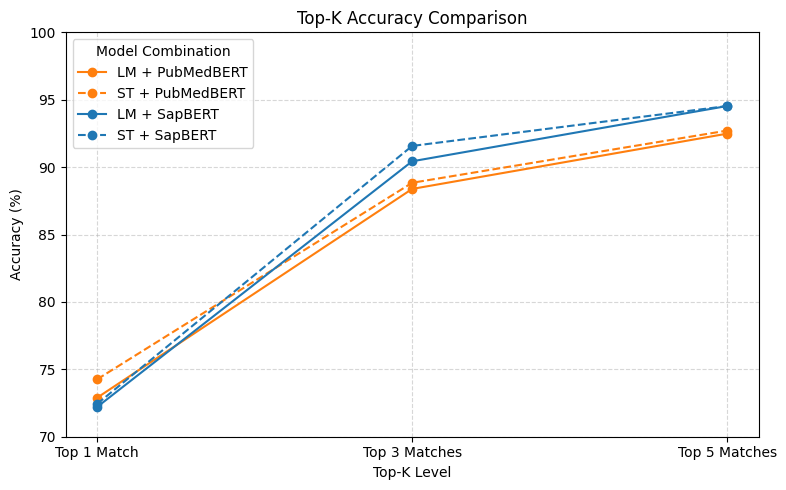

In [22]:
import matplotlib.pyplot as plt

for df, name in [
    (lm_sapbert_accuracy_df, ("SapBERT", "LM")),
    (lm_pubmedbert_accuracy_df, ("PubMedBERT", "LM")),
    (st_sapbert_accuracy_df, ("SapBERT", "ST")),
    (st_pubmedbert_accuracy_df, ("PubMedBERT", "ST")),
]:
    df["Model"] = name[0]
    df["Type"] = name[1]  # LM or ST

all_df = pd.concat([
    lm_sapbert_accuracy_df,
    lm_pubmedbert_accuracy_df,
    st_sapbert_accuracy_df,
    st_pubmedbert_accuracy_df
])

plt.figure(figsize=(8, 5))

model_palette = {
    "SapBERT": "#1f77b4",      
    "PubMedBERT": "#ff7f0e"    
}
linestyle_map = {
    "LM": "-",
    "ST": "--"
}

for (model, typ), subdf in all_df.groupby(["Model", "Type"]):
    plt.plot(
        subdf["Accuracy Level"],
        subdf["Accuracy"],
        label=f"{typ} + {model}",
        linestyle=linestyle_map[typ],
        color=model_palette[model],
        marker="o"
    )

plt.title("Top-K Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Top-K Level")
plt.ylim(70, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Model Combination")
plt.tight_layout()
plt.show()


In [51]:
# RAG Strategy w/ msr-biomed-bert
rag_engine = ome.OntoMapEngine(method='msr-biomed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_msr_result = rag_engine.run()

11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 12:35:1749627351 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//202

Processing queries: 100%|██████████| 439/439 [00:05<00:00, 73.64it/s]

11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 12:35:1749627357 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
# RAG Strategy w/ msr-biomed-bert
rag_msr_accuracy_df = calc.calc_accuracy(rag_msr_result)
rag_msr_accuracy = rag_msr_accuracy_df[rag_msr_accuracy_df["Accuracy Level"] ==
                                       "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG PubMedBERT Top-5 Accuracy: {rag_msr_accuracy:.2f}%")
print(rag_msr_accuracy_df)

RAG PubMedBERT Top-5 Accuracy: 34.40%
  Accuracy Level   Accuracy
0    Top 1 Match   9.567198
1  Top 3 Matches  24.145786
2  Top 5 Matches  34.396355


In [7]:
# RAG Strategy w/ biolink-large
rag_engine = ome.OntoMapEngine(method='biolink-large',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_biolink_result = rag_engine.run()

11/06//2025 01:02:1749628924 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 01:02:1749628924 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 01:02:1749628924 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 01:02:1749628924 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 01:02:1749628924 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 01:02:1749628924 AM - INFO - OntoMapRAG: Generating results table


Processing queries: 100%|██████████| 439/439 [00:26<00:00, 16.72it/s]

11/06//2025 01:02:1749628951 AM - INFO - OntoMapRAG: Results Generated


In [8]:
# RAG Strategy w/ biolink-large
rag_biolink_accuracy_df = calc.calc_accuracy(rag_biolink_result)
rag_biolink_accuracy = rag_biolink_accuracy_df[
    rag_biolink_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG BioLinkBERT Top-5 Accuracy: {rag_biolink_accuracy:.2f}%")
print(rag_biolink_accuracy_df)

RAG BioLinkBERT Top-5 Accuracy: 26.65%
  Accuracy Level   Accuracy
0    Top 1 Match   9.567198
1  Top 3 Matches  18.906606
2  Top 5 Matches  26.651481


In [17]:
# RAG Strategy w/ pubmed-bert
rag_engine = ome.OntoMapEngine(method='pubmed-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_pubmed_result = rag_engine.run()

13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Running Ontology Mapping
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
13/06//2025 11:33:1749839608 AM

Processing queries:   0%|          | 0/439 [00:00<?, ?it/s]Exception in worker
Traceback (most recent call last):
  File "/home/lcc/miniconda3/envs/py310/lib/python3.10/concurrent/futures/thread.py", line 81, in _worker
    work_item = work_queue.get(block=True)
  File "src/gevent/queue.py", line 381, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 397, in gevent._gevent_cqueue.SimpleQueue.get
  File "src/gevent/queue.py", line 373, in gevent._gevent_cqueue.SimpleQueue._SimpleQueue__get_or_peek
  File "src/gevent/_waiter.py", line 154, in gevent._gevent_c_waiter.Waiter.get
  File "src/gevent/_greenlet_primitives.py", line 65, in gevent._gevent_c_greenlet_primitives.SwitchOutGreenletWithLoop.switch
  File "src/gevent/_gevent_c_greenlet_primitives.pxd", line 35, in gevent._gevent_c_greenlet_primitives._greenlet_switch
gevent.exceptions.LoopExit: This operation would block forever
	Hub: <Hub '' at 0x7f5db426ec00 epoll pending=0 ref=0 fileno=101 thread_ident=0x7

13/06//2025 11:33:1749839618 AM - INFO - OntoMapRAG: Results Generated
13/06//2025 11:33:1749839618 AM - INFO - OntoMapRAG: Results Generated


In [ ]:
rag_pubmed_result.to_csv("rag_pubmed_result_partially_cleaned_contexts.csv",
                         index=False)

In [18]:
# RAG Strategy w/ pubmed-bert
rag_pubmed_accuracy_df = calc.calc_accuracy(rag_pubmed_result)
rag_pubmed_accuracy = rag_pubmed_accuracy_df[
    rag_pubmed_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG PubMedBERT Top-5 Accuracy: {rag_pubmed_accuracy:.2f}%")
print(rag_pubmed_accuracy_df)

RAG PubMedBERT Top-5 Accuracy: 93.85%
  Accuracy Level   Accuracy
0    Top 1 Match  70.387244
1  Top 3 Matches  89.293850
2  Top 5 Matches  93.849658


In [8]:
# RAG Strategy w/ clinical-bert
rag_engine = ome.OntoMapEngine(method='clinical-bert',
                               topk=5,
                               query=query_list,
                               corpus=small_corpus_list,
                               cura_map=cura_map,
                               yaml_path='./src/models/method_model.yaml',
                               om_strategy='rag',
                               test_or_prod='test')
rag_clinical_result = rag_engine.run()

11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Initialized OntoMap Engine module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running Ontology Mapping
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Separating exact and non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapEngine: Running OntoMap model for non-exact matches
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Initialized OntoMapRAG module
11/06//2025 02:08:1749632890 AM - INFO - OntoMapRAG: Generating results table
11/06//2025 02:08:174963

Processing queries: 100%|██████████| 439/439 [00:16<00:00, 26.07it/s]

11/06//2025 02:08:1749632907 AM - INFO - OntoMapRAG: Results Generated
11/06//2025 02:08:1749632907 AM - INFO - OntoMapRAG: Results Generated


In [9]:
rag_clinical_accuracy_df = calc.calc_accuracy(rag_clinical_result)
rag_clinical_accuracy = rag_clinical_accuracy_df[
    rag_clinical_accuracy_df["Accuracy Level"] ==
    "Top 5 Matches"]["Accuracy"].values[0]
print(f"RAG ClinicalBERT Top-5 Accuracy: {rag_clinical_accuracy:.2f}%")
print(rag_clinical_accuracy_df)

RAG ClinicalBERT Top-5 Accuracy: 37.81%
  Accuracy Level   Accuracy
0    Top 1 Match  10.022779
1  Top 3 Matches  26.879271
2  Top 5 Matches  37.813212


Sample output

In [15]:
from src.KnowledgeDb.faiss_sqlite_pipeline import UMLSDb

umls = UMLSDb(api_key="")
codes = umls.get_nci_code_by_term("Breast Papillary Ductal Carcinoma with Invasion")
print(codes)

Error fetching NCI code for 'Breast Papillary Ductal Carcinoma with Invasion': 401 Client Error: Unauthorized for url: https://uts-ws.nlm.nih.gov/rest/search/current?string=Breast+Papillary+Ductal+Carcinoma+with+Invasion&apiKey=&pageNumber=1&searchType=exact&sabs=NCI&returnIdType=code
[]


In [16]:
from src.KnowledgeDb.faiss_sqlite_pipeline import NCIDb

nci = NCIDb(umls_api_key="")
conceptDict = nci.get_custom_concepts_by_codes(["C7439"], ["roles"])
print(conceptDict)

context = nci.create_context_list(conceptDict["C7439"])

print(context)

{'C7439': {'code': 'C7439', 'name': 'Breast Papillary Ductal Carcinoma In Situ with Invasion', 'terminology': 'ncit', 'version': '25.05d', 'conceptStatus': 'DEFAULT', 'leaf': True, 'active': True, 'roles': [{'type': 'Disease_Has_Abnormal_Cell', 'relatedCode': 'C36773', 'relatedName': 'Adenocarcinoma Cell'}, {'type': 'Disease_Excludes_Finding', 'relatedCode': 'C36122', 'relatedName': 'Benign Cellular Infiltrate'}, {'type': 'Disease_May_Have_Finding', 'relatedCode': 'C3197', 'relatedName': 'Breast Lump'}, {'type': 'Disease_Has_Associated_Anatomic_Site', 'relatedCode': 'C12971', 'relatedName': 'Breast'}, {'type': 'Disease_Has_Primary_Anatomic_Site', 'relatedCode': 'C12971', 'relatedName': 'Breast'}, {'type': 'Disease_Has_Finding', 'relatedCode': 'C54172', 'relatedName': 'Carcinomatous Component Present'}, {'type': 'Disease_Has_Normal_Cell_Origin', 'relatedCode': 'C12578', 'relatedName': 'Epithelial Cell'}, {'type': 'Disease_Has_Finding', 'relatedCode': 'C53596', 'relatedName': 'Epithelial

Overlapping of different strategies

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def compute_overlap_matrix(data_dict):
    methods = list(data_dict.keys())
    matrix = pd.DataFrame(index=methods, columns=methods)

    for m1 in methods:
        for m2 in methods:
            if m1 == m2:
                matrix.loc[m1, m2] = 1.0
            else:
                intersect = len(data_dict[m1] & data_dict[m2])
                union = len(data_dict[m1] | data_dict[m2])
                matrix.loc[m1, m2] = round(intersect / union, 3)
    return matrix


def plot_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix.astype(float),
                annot=True,
                fmt=".2f",
                cmap="Blues",
                linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()


In [9]:
files = {
    'lm':
    'data/outputs/cbio_bodysite/lm_sapbert_result.csv',
    'st':
    'data/outputs/cbio_bodysite/st_sapbert_result.csv',
    'rag1':
    'data/outputs/cbio_bodysite/rag_sapbert_result_removed_duplicates.csv',
    'rag2':
    'data/outputs/cbio_bodysite/rag_sapbert_result_partially_cleaned_contexts.csv',
    'rag3':
    'data/outputs/cbio_bodysite/rag_pubmed_result_partially_cleaned_contexts.csv',
}

top1_dict = {}
top5_dict = {}

for name, path in files.items():
    df = pd.read_csv(path)
    top1_dict[name] = set(df[df['match_level'] == 1]['original_value'])
    top5_dict[name] = set(df[df['match_level'] <= 5]['original_value'])

top1_overlap = compute_overlap_matrix(top1_dict)
top5_overlap = compute_overlap_matrix(top5_dict)

print("🔹 Top1 Jaccard Overlap Matrix")
print(top1_overlap)

print("\n🔹 Top5 Jaccard Overlap Matrix")
print(top5_overlap)

🔹 Top1 Jaccard Overlap Matrix
         lm     st   rag1   rag2   rag3
lm      1.0  0.884  0.759  0.719  0.754
st    0.884    1.0  0.772  0.737  0.781
rag1  0.759  0.772    1.0  0.895  0.721
rag2  0.719  0.737  0.895    1.0  0.726
rag3  0.754  0.781  0.721  0.726    1.0

🔹 Top5 Jaccard Overlap Matrix
         lm     st   rag1   rag2   rag3
lm      1.0  0.899  0.855  0.853  0.822
st    0.899    1.0  0.851  0.849  0.836
rag1  0.855  0.851    1.0  0.973  0.915
rag2  0.853  0.849  0.973    1.0  0.908
rag3  0.822  0.836  0.915  0.908    1.0


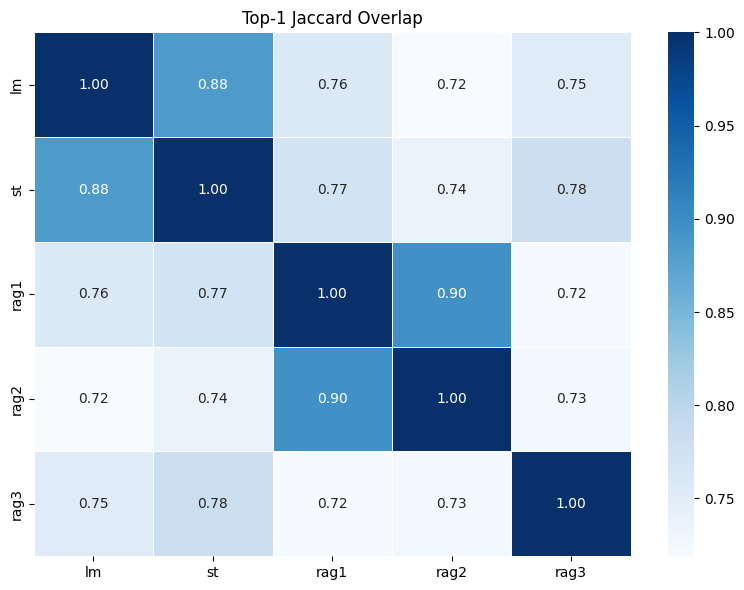

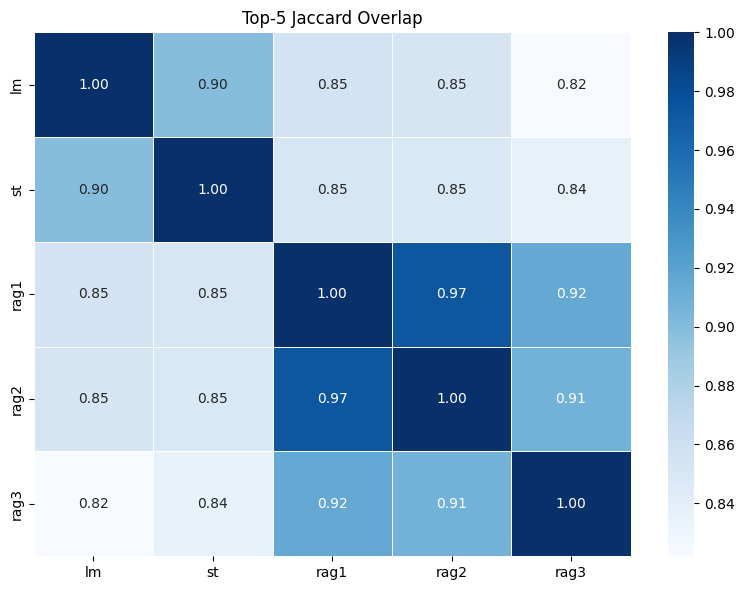

In [10]:
plot_heatmap(top1_overlap, "Top-1 Jaccard Overlap")
plot_heatmap(top5_overlap, "Top-5 Jaccard Overlap")